# Introduction

Pandas is Python package used for data manipulation and analysis. The name is derived from the term "panel data".

To use pandas, you need to import it. And numpy is required as well.
It is generally imported using `np` and `pd` as abbreviations.

In [132]:
import numpy as np
import pandas as pd

# Pandas objects

## Series

- One dimensional array of indexed data
- Can be used to convert a dictionary
  - Like dictionaries, Series can be access using “keys” (index)
  - Contrary to dictionaries, Series can be sliced

In [151]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print(population)
population["California":"Texas"]

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


California    38332521
Texas         26448193
dtype: int64

## Dataframes

- Two dimensional array of indexed data but can be thought of as sequences of Series objects
- 2 distinct Index objects will define the rows and the columns

In [134]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


## Index

- Immutable array used to index the Series and Dataframes object

In [135]:
print(states.index)
print(states.columns)
print(type(states.index))
print(type(states.columns))

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Index(['population', 'area'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


# Import data

In our setting, you are usually going to be importing data from a csv/tsv or an excel. And you chose pandas because the data structure is a bit too complex or it is just an easy way to quickly import it.
In this session, i'll be taking you into a deep dive of the new test directory.

In [136]:
df = pd.read_excel("td_v5.xlsx", sheet_name=None, header=1)
df.keys()

dict_keys(['Explanatory note ', 'R&ID indications', 'Neuro STR routing'])

In the previous command, I'm importing the test directory but i know that the excel has multiple sheets and by default the `read_excel` cmd will use the first sheet and discard the rest.
The header option specifies which line is the header.

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [137]:
df = df["R&ID indications"]
df.head()

,Clinical indication ID,Test ID,Clinical Indication,Target/Genes,Test Method,Commissioning category,Specialist test group,Changes since October 2022 v4 publication,Single national provider,North East & Yorkshire GLH,North West GLH,East GLH,Central & South GLH,South West GLH,North Thames GLH,South East GLH
0,R67,R67.1,Monogenic hearing loss,Hearing loss (126),WES or Large Panel,Specialised,Audiology,Update to gene content via PanelApp route,No,North West GLH - Manchester University FT,North West GLH - Manchester University FT,North West GLH- Manchester University FT,North Thames GLH - Great Ormond Street FT,North Thames GLH - Great Ormond Street FT,North Thames GLH - Great Ormond Street FT,North Thames GLH - Great Ormond Street FT
1,R67,R67.2,Monogenic hearing loss,Hearing loss (126),MLPA or equivalent,Specialised,Audiology,No change,No,North West GLH - Manchester University FT,North West GLH - Manchester University FT,North West GLH- Manchester University FT,North Thames GLH - Great Ormond Street FT,North Thames GLH - Great Ormond Street FT,North Thames GLH - Great Ormond Street FT,North Thames GLH - Great Ormond Street FT
2,R125,R125.1,Thoracic aortic aneurysm or dissection,Thoracic aortic aneurysm or dissection (700),WES or Medium Panel,Specialised,Cardiology,Update to gene content via PanelApp route,No,North West GLH - Manchester University FT,North West GLH - Manchester University FT,South West GLH - North Bristol Trust,Central and South GLH - Salisbury FT,South West GLH - North Bristol Trust,South East GLH - Royal Brompton and Harefield FT,South East GLH - Royal Brompton and Harefield FT
3,R125,R125.2,Thoracic aortic aneurysm or dissection,Thoracic aortic aneurysm or dissection (700),MLPA or equivalent,Specialised,Cardiology,No change,No,North West GLH - Manchester University FT,North West GLH - Manchester University FT,South West GLH - North Bristol Trust,Central and South GLH - Salisbury FT,South West GLH - North Bristol Trust,South East GLH - Royal Brompton and Harefield FT,South East GLH - Royal Brompton and Harefield FT
4,R127,R127.1,Long QT syndrome,Long QT syndrome (76),Small panel,Specialised,Cardiology,No change,No,North West GLH - Manchester University FT,North West GLH - Manchester University FT,South West GLH - North Bristol Trust,Central and South GLH - Oxford University FT,South West GLH - North Bristol Trust,South East GLH - Royal Brompton and Harefield FT,South East GLH - Royal Brompton and Harefield FT


We can safely remove columns after the `Changes since October 2022 v4 publication` column.

In [138]:
df.drop(df.columns[8:], axis=1, inplace=True)
df.head()

,Clinical indication ID,Test ID,Clinical Indication,Target/Genes,Test Method,Commissioning category,Specialist test group,Changes since October 2022 v4 publication
0,R67,R67.1,Monogenic hearing loss,Hearing loss (126),WES or Large Panel,Specialised,Audiology,Update to gene content via PanelApp route
1,R67,R67.2,Monogenic hearing loss,Hearing loss (126),MLPA or equivalent,Specialised,Audiology,No change
2,R125,R125.1,Thoracic aortic aneurysm or dissection,Thoracic aortic aneurysm or dissection (700),WES or Medium Panel,Specialised,Cardiology,Update to gene content via PanelApp route
3,R125,R125.2,Thoracic aortic aneurysm or dissection,Thoracic aortic aneurysm or dissection (700),MLPA or equivalent,Specialised,Cardiology,No change
4,R127,R127.1,Long QT syndrome,Long QT syndrome (76),Small panel,Specialised,Cardiology,No change


Let's say that we want to get all the clinical indications that had changes i.e. remove the lines with the `No change`.

In [139]:
df_with_changes = df[df["Changes since October 2022 v4 publication"].str.contains("No change")==False]
df_with_changes.head()

,Clinical indication ID,Test ID,Clinical Indication,Target/Genes,Test Method,Commissioning category,Specialist test group,Changes since October 2022 v4 publication
0,R67,R67.1,Monogenic hearing loss,Hearing loss (126),WES or Large Panel,Specialised,Audiology,Update to gene content via PanelApp route
2,R125,R125.1,Thoracic aortic aneurysm or dissection,Thoracic aortic aneurysm or dissection (700),WES or Medium Panel,Specialised,Cardiology,Update to gene content via PanelApp route
8,R129,R129.1,Catecholaminergic polymorphic VT,Catecholaminergic polymorphic VT (214),Small panel,Specialised,Cardiology,Update to gene content via PanelApp route
12,R131,R131.1,Hypertrophic cardiomyopathy,Hypertrophic cardiomyopathy - teen and adult (49),WES or Medium Panel,Specialised,Cardiology,Update to gene content via PanelApp route
18,R135,R135.2,Paediatric or syndromic cardiomyopathy,Cardiomyopathies - including childhood onset (...,WGS,Specialised,Cardiology,Update to gene content via PanelApp route


Let's break down the command line:

In [140]:
df["Changes since October 2022 v4 publication"].head()

0    Update to gene content via PanelApp route
1                                    No change
2    Update to gene content via PanelApp route
3                                    No change
4                                    No change
Name: Changes since October 2022 v4 publication, dtype: object

In [141]:
type(df["Changes since October 2022 v4 publication"])

pandas.core.series.Series

In [142]:
df["Changes since October 2022 v4 publication"].str.contains("No change")

0      False
1       True
2      False
3       True
4       True
       ...  
623     True
624     True
625    False
626     True
627    False
Name: Changes since October 2022 v4 publication, Length: 628, dtype: bool

In [143]:
df_with_changes.shape

(127, 8)

Now we have all the clinical indications that are going to require some work. We can see what type of work by looking at the same column.

In [144]:
df_with_changes["Changes since October 2022 v4 publication"].unique()

array(['Update to gene content via PanelApp route',
       'Addition of semi-rapid testing pathway for WGS indications',
       'Test type reinstated',
       'New clinical indication added, panel line',
       'New clinical indication added, CNV line', 'Removed STR line',
       'Added Confirmatory STR testing ', 'Gene target addition',
       'New Clinical Indication added',
       'Addition of Semi-rapid testing pathway for WGS indications',
       'New clinical indication added',
       'POT1 gene target added, moved to small panel ',
       'POT1 gene target added', 'New test type added ',
       'Test type added for deep sequencing',
       'Removed STR line as STR to be analysed off of WGS',
       'Removed STR line as STRs to be analysed off of WGS',
       'RFC1 STR added', 'no change ',
       'Update to gene content via PanelApp route, Changed CI name',
       'Addition of semi-rapid testing pathway for WGS indications '],
      dtype=object)

In [145]:
df_with_changes["Changes since October 2022 v4 publication"].unique().shape

(21,)

21 "different" types of changes. It's still quite a lot.

We can trim it down by filtering on the test method.

In [146]:
filtering_string = [
        "Medium panel", "Single gene sequencing <=10 amplicons",
        "Single gene sequencing <10 amplicons",
        "Single gene sequencing >=10 amplicons",
        "Single gene testing (<10 amplicons)", "small panel", "Small panel",
        "Small panel - deep sequencing", "WES or Large panel", "WES or Large Panel",
        "WES or Large penel", "WES or Medium panel", "WES or Medium Panel",
        "WES or Small Panel", "WGS"
]

df_test_method_filtered = df_with_changes[df_with_changes["Test Method"].str.contains("|".join(filtering_string))]
print(df_test_method_filtered["Changes since October 2022 v4 publication"].unique().shape)
df_test_method_filtered

(7,)


/tmp/ipykernel_27596/2676225020.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_test_method_filtered = df_with_changes[df_with_changes["Test Method"].str.contains("|".join(filtering_string))]


,Clinical indication ID,Test ID,Clinical Indication,Target/Genes,Test Method,Commissioning category,Specialist test group,Changes since October 2022 v4 publication
0,R67,R67.1,Monogenic hearing loss,Hearing loss (126),WES or Large Panel,Specialised,Audiology,Update to gene content via PanelApp route
2,R125,R125.1,Thoracic aortic aneurysm or dissection,Thoracic aortic aneurysm or dissection (700),WES or Medium Panel,Specialised,Cardiology,Update to gene content via PanelApp route
8,R129,R129.1,Catecholaminergic polymorphic VT,Catecholaminergic polymorphic VT (214),Small panel,Specialised,Cardiology,Update to gene content via PanelApp route
12,R131,R131.1,Hypertrophic cardiomyopathy,Hypertrophic cardiomyopathy - teen and adult (49),WES or Medium Panel,Specialised,Cardiology,Update to gene content via PanelApp route
18,R135,R135.2,Paediatric or syndromic cardiomyopathy,Cardiomyopathies - including childhood onset (...,WGS,Specialised,Cardiology,Update to gene content via PanelApp route
...,...,...,...,...,...,...,...,...
595,R139,R139.1,Laterality disorders and isomerism,Laterality disorders and isomerism (549),WES or Medium Panel,Specialised,Respiratory,Update to gene content via PanelApp route
601,R189,R189.1,Respiratory ciliopathies including non-CF bron...,Respiratory ciliopathies including non-CF bron...,WES or Medium Panel,Specialised,Respiratory,Update to gene content via PanelApp route
613,R434,R434.1,Recurrent episodic apnoea,Recurrent episodic apnoea (1219),Small panel,Specialised,Respiratory,New clinical indication added
625,R412,R412.1,Fetal anomalies with a likely genetic cause - ...,Fetal anomalies (478),WES or Large Panel,Specialised,Specialised,Update to gene content via PanelApp route


One thing I'm interested in is if the targets for the clinical indications are panelapp panels or single genes.
Let's check that out.

In [156]:
df_test_method_filtered[df_test_method_filtered["Test ID"].str.contains("R144")].loc[:, ["Clinical indication ID", "Clinical Indication", "Target/Genes"]]

,Clinical indication ID,Clinical Indication,Target/Genes
158,R144,Congenital hyperinsulinism,ABCC8;KCNJ11


These genes will need to be checked.
Let's extract them.

In [148]:
df_single_genes = df_test_method_filtered[df_test_method_filtered["Target/Genes"].str.contains("\(")==False]
df_single_genes.loc[:, "Target/Genes"].iloc[0]

'BRCA1, BRCA2, MLH1, MSH2, MSH6, ATM, PALB2, CHEK2\xa0'

Looks like the encoding of the excel file is wrong. Let's fix that.

In [149]:
df_normalized = df_test_method_filtered.apply(lambda x: x.str.normalize("NFKD").str.strip())
df_single_genes = df_normalized[df_normalized["Target/Genes"].str.contains("\(")==False]
df_single_genes.loc[:, "Target/Genes"].iloc[0]

'BRCA1, BRCA2, MLH1, MSH2, MSH6, ATM, PALB2, CHEK2'

I also need to look at the panelapp panels and their content to see if any work on the panel database is necessary.

In [150]:
import regex

df_panels = df_normalized[df_normalized["Target/Genes"].str.contains("\(")==True]

panelapp_panel_ids = []

for panel in df_panels["Target/Genes"]:
    match = regex.search(r"[0-9]+", panel)
    panelapp_panel_ids.append(match.group(0))

panelapp_panel_ids

['126',
 '700',
 '214',
 '49',
 '749',
 '478',
 '486',
 '285',
 '490',
 '553',
 '555',
 '77',
 '565',
 '293',
 '473',
 '650',
 '130',
 '546',
 '483',
 '514',
 '1217',
 '508',
 '508',
 '525',
 '157',
 '519',
 '518',
 '398',
 '526',
 '528',
 '529',
 '467',
 '533',
 '534',
 '535',
 '536',
 '537',
 '538',
 '539',
 '168',
 '196',
 '309',
 '269',
 '496',
 '147',
 '465',
 '466',
 '488',
 '540',
 '847',
 '474',
 '402',
 '567',
 '568',
 '579',
 '22',
 '207',
 '225',
 '258',
 '488',
 '78',
 '179',
 '491',
 '162',
 '230',
 '307',
 '509',
 '186',
 '3',
 '487',
 '106',
 '292',
 '548',
 '149',
 '678',
 '549',
 '550',
 '1219',
 '478',
 '749']

### More attributes of a Dataframe

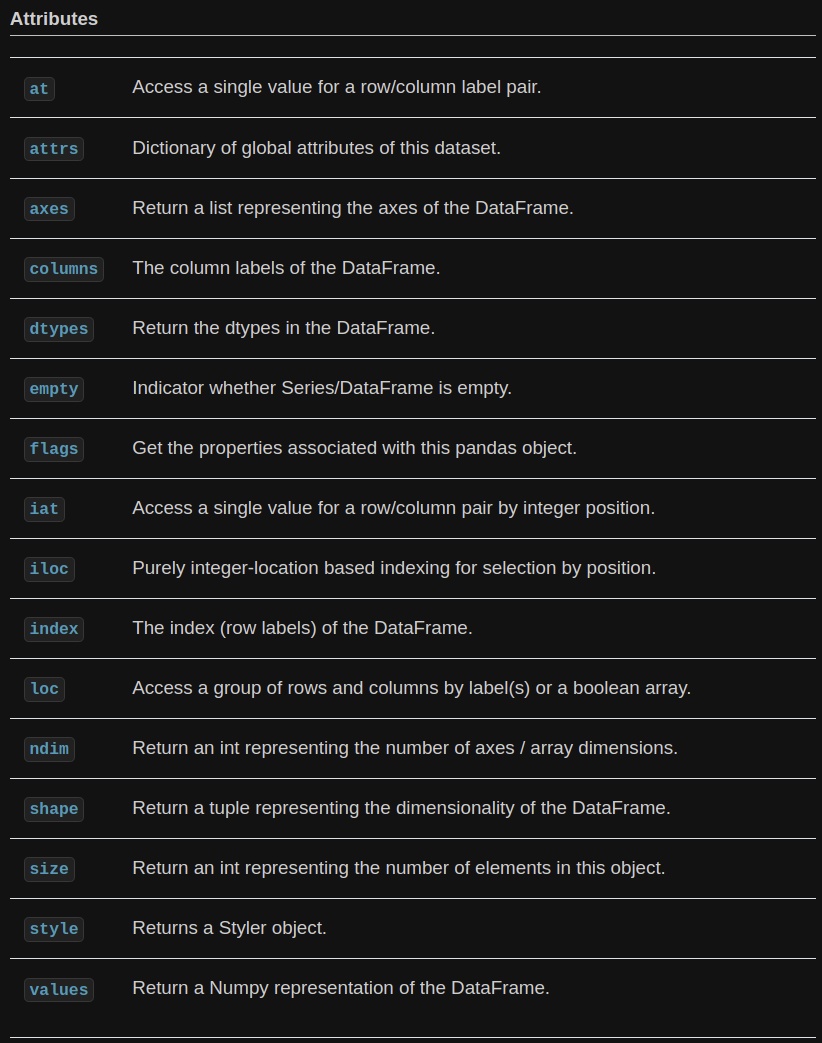

### Lots of functions that can be applied to a Dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

# Examples in our Github

https://github.com/eastgenomics/test_directory_parser/blob/64dc19309af501bb980717ecc1dc19df3a12deda/test_directory_parser/rare_disease.py#L22

https://github.com/eastgenomics/Ploutos/blob/be32e9313648c1bec52c24d6f8ab790f803cb690/Ploutos/scripts/leaderboard_plots.py#L1291

https://github.com/eastgenomics/athena/blob/a6371df55390b030d03682de3abe5bedf6399077/bin/load_data.py#L85

# Resources

https://pandas.pydata.org/docs/user_guide/10min.html 

https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html